In [32]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import sys
sys.path.append("../")
from utils.data_processing import parse_input


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
input_path = "../../new_data/Train/"
X_all, y_all = parse_input(input_path, age_to_group=True)

In [55]:
from sklearn.model_selection import KFold
import math
from utils.scoring import age_score

def k_fold_age(X, y, model, age_to_group=True, n_splits=5):
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X)
    k_results = {"train": [], "test": []}
    for train_index, test_index in kf.split(X['user_id']):
        X_train = {}
        X_test = {}
        train_user_ids = X['user_id'][train_index]
        test_user_ids = X['user_id'][test_index]
        for key, value in X.items():
            if key == "user_id":
                X_train[key], X_test[key] = train_user_ids, test_user_ids
            else:
                X_train[key], X_test[key] = X[key].loc[train_user_ids], X[key].loc[test_user_ids]
        y_train, y_test = y.loc[train_user_ids], y.loc[test_user_ids]
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        # print(f"y_pred_train.shape = {y_pred_train.shape}, y_train.shape = {y_train.shape}")
        train_score = age_score(y_pred_train, y_train, age_to_group)
        k_results['train'].append(train_score)

        y_pred_test = model.predict(X_test)
        test_score = age_score(y_pred_test, y_test, age_to_group)
        k_results['test'].append(test_score)
        print(f"train_acc = {train_score}, test_acc = {test_score}")

    for key, result in k_results.items():
        print(
            # f"{key} : {np.mean(result)} +- {1.96 * np.std(result) / math.sqrt(len(result))}")
            f"{key} : {np.mean(result)} +- {1.96 * np.std(result)}")
    return k_results


In [57]:
from models.age_estimator import AgeEstimator

agemodel_1 = AgeEstimator(n_estimators=100, minimum_like_counts=2)
kf_results = k_fold_age(X_all, y_all['age'], agemodel_1)
print(kf_results)

fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[0.91509941 0.9132948  0.87419355 0.9528922 ]
[0.45740741 0.33888889 0.13333333 0.8479638 ]
train_acc = 0.935921052631579, test_acc = 0.6605263157894737
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[0.91217257 0.91272727 0.87658228 0.94525709]
[0.47577093 0.33636364 0.13043478 0.86257563]
train_acc = 0.9303947368421053, test_acc = 0.6826315789473684
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[0.91498186 0.90279465 0.8585209  0.94666079]
[0.43432203 0.31981982 0.12162162 0.87985866]
train_acc = 0.9302631578947368, test_acc = 0.6742105263157895
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[0.91852621 0.90322581 0.85521886 0.94910773]
[0.47257384 0.33653846 0.11363636 0.86106195]
train_acc = 0.9326315789473684, test_acc = 0.6721052631578948
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[0.90876289 0.89759036 0.86928105 0.9520336 ]
[0.45119306 0.35813953 0

In [ ]:
# models_vary_estimators = [AgeEstimator(n_estimators=10), 
#                           AgeEstimator(n_estimators=100), 
#                           AgeEstimator(n_estimators=200),
#                           AgeEstimator(n_estimators=500),
#                           AgeEstimator(n_estimators=1000),
#                           AgeEstimator(n_estimators=1500)]

models_vary_estimators = [AgeEstimator(minimum_like_counts=1), 
                          AgeEstimator(minimum_like_counts=3), 
                          AgeEstimator(minimum_like_counts=3),
                          AgeEstimator(minimum_like_counts=4)]


results_vary_estimators = []

for model in models_vary_estimators:
    results_vary_estimators.append(k_fold_age(X_all, y_all['age'], model))

fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[1. 1. 1. 1.]
[0.39444444 0.27222222 0.29333333 0.85339367]
train_acc = 1.0, test_acc = 0.6457894736842106
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[1. 1. 1. 1.]
[0.47577093 0.24545455 0.13043478 0.85047537]
train_acc = 1.0, test_acc = 0.6647368421052632
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[1. 1. 1. 1.]
[0.45762712 0.18018018 0.21621622 0.87190813]
train_acc = 1.0, test_acc = 0.6626315789473685
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[1. 1. 1. 1.]
[0.47679325 0.27403846 0.13636364 0.85575221]
train_acc = 1.0, test_acc = 0.6642105263157895
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[1. 1. 1. 1.]
[0.46203905 0.28372093 0.2278481  0.8628821 ]
train_acc = 1.0, test_acc = 0.6736842105263158
train : 1.0 +- 0.0
test : 0.6622105263157895 +- 0.017788680891708483
fit train: X_train.shape = (7600, 64), y_train.shape = (7600,)
[0.87533584 0.8693

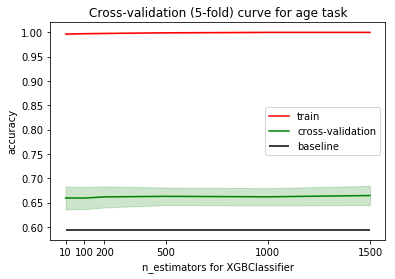

In [21]:
from matplotlib import pyplot as plt
# results_vary_estimators
train_means = np.array([np.mean(res['train']) for res in results_vary_estimators])
train_std = np.array([np.std(res['train'])*1.96 for res in results_vary_estimators])
test_means = np.array([np.mean(res['test']) for res in results_vary_estimators])
test_std = np.array([np.std(res['test'])*1.96 for res in results_vary_estimators])
n_estimators = [10, 100, 200, 500, 1000, 1500]
plt.plot(n_estimators, train_means, label="train", color='r')
plt.fill_between(n_estimators, train_means-train_std, train_means+train_std, color='r', alpha=0.2)
plt.plot(n_estimators, test_means, label='cross-validation', color='g')
plt.fill_between(n_estimators, test_means-test_std, test_means+test_std, color='g', alpha=0.2)
plt.hlines(y=.594, xmin=10, xmax=1500, label="baseline")
plt.xticks(n_estimators, n_estimators)
plt.xlabel("n_estimators for XGBClassifier")
plt.ylabel("accuracy")
plt.title("Cross-validation (5-fold) curve for age task")
plt.legend()

7
